<a href="https://colab.research.google.com/github/gdg-ml-team/DevFest19/blob/master/Pre_processing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pre-processing Data or Data Wrangling

<h2>What is the purpose of Data Wrangling?</h2>
Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis.

<h2>Read Dataset Description</h2>
We want to predict students performance in math in secondary education of two high schools. Please read the description of data set before start.

 [Dataset Description](https://archive.ics.uci.edu/ml/datasets/student+performance)

<h3>Import data</h3>
<p>
here link of raw data set: <a href="https://github.com/gdg-ml-team/DevFest19/blob/master/student-mat-raw.csv">https://github.com/gdg-ml-team/DevFest19/blob/master/student-mat-raw.csv</a>. 

</p>

<h4>Import pandas</h4> 

In [0]:
import pandas as pd
import matplotlib.pylab as plt

<h2>Reading the data set from the URL.</h2>

In [2]:
#URL of the dataset
filename = "https://raw.githubusercontent.com/gdg-ml-team/DevFest19/master/student-mat-raw.csv"

#Use the Pandas method read_csv() to load the data from the web address.
df = pd.read_csv(filename)

#Use the method head() to display the first five rows of the dataframe.
# To see what the data set looks like, we'll use the head() method.
df.head(10)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,NaN,yes,no,no,no,yes,yes,no,no,4,?,4,1,1,3,NaN,5.0,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,course,father,1,2,NaN,no,yes,no,no,no,yes,yes,no,5,?,3,1,1,3,NaN,5.0,5,6
2,GP,Female,15.0,U,LE3,T,1,1,at_home,other,other,mother,1,2,3.0,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10.0,7.0,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,home,mother,1,3,0.0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2.0,15.0,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,home,father,1,2,0.0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4.0,6.0,10,10
5,GP,Male,16.0,U,LE3,T,4,3,services,other,reputation,mother,1,2,0.0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10.0,15.0,15,15
6,GP,M,16.0,U,LE3,T,2,2,other,other,home,mother,1,2,0.0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0.0,12.0,12,11
7,NaN,NaN,NaN,NaN,GT3,A,4,4,other,teacher,home,mother,2,2,0.0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6.0,6.0,5,6
8,NaN,M,15.0,U,LE3,A,3,2,services,other,home,mother,1,2,0.0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0.0,16.0,18,19
9,NaN,M,15.0,U,GT3,T,3,4,other,other,home,mother,1,2,0.0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0.0,14.0,15,15


#Dealing with Missing Values

As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis. 
<div>So, how do we identify all those missing values and deal with them?</div> 


<h1>How to work with missing data?</h1>

Steps for working with missing data:
<ol>
    <li>identify missing data</li>
    <li>deal with missing data</li>
    <li>correct data format</li>
</ol>

<h2>Identify and handle missing values</h2>


<h1 id="identify_missing_values">1. Identify missing values</h1>
<h4>Convert "?" to NaN</h4>
In the car dataset, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience. Here we use the function: 
 <pre>.replace(A, B, inplace = True) </pre>
to replace A by B

In [3]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,NaN,yes,no,no,no,yes,yes,no,no,4,NaN,4,1,1,3,NaN,5.0,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,course,father,1,2,NaN,no,yes,no,no,no,yes,yes,no,5,NaN,3,1,1,3,NaN,5.0,5,6
2,GP,Female,15.0,U,LE3,T,1,1,at_home,other,other,mother,1,2,3.0,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10.0,7.0,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,home,mother,1,3,0.0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2.0,15.0,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,home,father,1,2,0.0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4.0,6.0,10,10
5,GP,Male,16.0,U,LE3,T,4,3,services,other,reputation,mother,1,2,0.0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10.0,15.0,15,15
6,GP,M,16.0,U,LE3,T,2,2,other,other,home,mother,1,2,0.0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0.0,12.0,12,11
7,NaN,NaN,NaN,NaN,GT3,A,4,4,other,teacher,home,mother,2,2,0.0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6.0,6.0,5,6
8,NaN,M,15.0,U,LE3,A,3,2,services,other,home,mother,1,2,0.0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0.0,16.0,18,19
9,NaN,M,15.0,U,GT3,T,3,4,other,other,home,mother,1,2,0.0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0.0,14.0,15,15



<h4>Evaluating for Missing Data</h4>

The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [4]:
missing_data = df.isnull()
missing_data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


"True" stands for missing value, while "False" stands for not missing value.

<h2>Count missing values in each column</h2>

In [5]:
df.isnull().sum()

school        22
sex            1
age            1
address        1
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       2
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       2
goout          0
Dalc           0
Walc           0
health         0
absences       2
G1             2
G2             0
G3             0
dtype: int64

<h1 id="deal_missing_values">2. Deal with missing data</h1>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>


<b>Replace by mean:</b>
<ul>
    <li>"G1": 2 missing data, replace them with mean</li>
    <li>"absences": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"failures": 2 missing data, replace them with "0". 
        <ul>
    <li>Reason: 0 is most frequent, it is most likely to occur</li>
     </ul> </ul>
    <ul>
            <li>"freetime": 2 missing data, replace them with "3". 
        <ul>
            <li>Reason: 3 is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li> row #7 contains 4 missing data(school,sex,age,address) simply delete the whole row
        <ul>
            <li>Reason: school, sex ,age and address have missing value in the same rows</li>
        </ul>
    </li>
</ul>

<b>Drop the whole column:</b>
<ul>
    <li>"school": 22 missing data, simply delete the whole column
        <ul>
            <li>Whole columns should be dropped only if most entries in the column are empty. In our dataset, school has a lot of missing data and drop this column not effect.
</li>
        </ul>
    </li>
</ul>

<h4>Calculate the average of the column </h4>

In [6]:
avg_G1 = df["G1"].astype("float").mean(axis=0)
print("Average of G1:", int(avg_G1))

Average of G1: 10


<h4>Replace "NaN" by mean value in "G1" column</h4>

In [0]:
df["G1"].replace(np.nan, avg_G1, inplace=True)

<h4>Calculate the mean value for 'absences' column</h4>

In [8]:
avg_absences=df['absences'].astype('float').mean(axis=0)
print("Average of absences:", int(avg_absences))

Average of absences: 5


<h4>Replace NaN by mean value</h4>

In [0]:
df["absences"].replace(np.nan, avg_absences, inplace=True)

<h3>Replace by frequency</h3>

To see which values are present in a particular column, we can use the ".value_counts()" method:

In [10]:
df['failures'].value_counts()

0.0    310
1.0     50
2.0     17
3.0     16
Name: failures, dtype: int64

We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate for us the most common type automatically:

In [11]:
df['failures'].value_counts().idxmax()

0.0

The replacement procedure is very similar to what we have seen previously

In [0]:
#replace the missing 'failures' values by the most frequent 
df["failures"].replace(np.nan, 0, inplace=True)

In [13]:
df['freetime'].value_counts()

3    155
4    115
2     64
5     40
1     19
Name: freetime, dtype: int64

In [14]:
df['freetime'].value_counts().idxmax()

'3'

In [0]:
#replace the missing 'freetime' values by the most frequent 
df["freetime"].replace(np.nan, 3, inplace=True)

<h3>Drop the whole row</h3>

Finally, let's drop the row that do not have (sex,age,address)  data:

In [0]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["sex"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

<h3>Drop the whole column</h3>

In [0]:
# simply drop whole row with NaN in "price" column
df.drop(["school"], axis=1, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [18]:
df.head(10)

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18.0,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0.0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,5.712468,5.0,6,6
1,F,17.0,U,GT3,T,1,1,at_home,other,course,father,1,2,0.0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,5.712468,5.0,5,6
2,Female,15.0,U,LE3,T,1,1,at_home,other,other,mother,1,2,3.0,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10.000000,7.0,8,10
3,F,15.0,U,GT3,T,4,2,health,services,home,mother,1,3,0.0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2.000000,15.0,14,15
4,F,16.0,U,GT3,T,3,3,other,other,home,father,1,2,0.0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4.000000,6.0,10,10
5,Male,16.0,U,LE3,T,4,3,services,other,reputation,mother,1,2,0.0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10.000000,15.0,15,15
6,M,16.0,U,LE3,T,2,2,other,other,home,mother,1,2,0.0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0.000000,12.0,12,11
7,M,15.0,U,LE3,A,3,2,services,other,home,mother,1,2,0.0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0.000000,16.0,18,19
8,M,15.0,U,GT3,T,3,4,other,other,home,mother,1,2,0.0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0.000000,14.0,15,15
9,F,15.0,U,GT3,T,4,4,teacher,health,reputation,mother,1,2,0.0,no,yes,yes,no,yes,yes,yes,no,3,3,3,1,2,2,0.000000,10.0,8,9


<b>Good!</b> Now, we obtain the dataset with no missing values.

<h1 id="correct_data_format">3. Correct data format</h1>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use 
<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>

<h4>Lets list the data types for each column</h4>

In [19]:
df.dtypes

sex            object
age           float64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures      float64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel          int64
freetime       object
goout           int64
Dalc            int64
Walc            int64
health          int64
absences      float64
G1            float64
G2              int64
G3              int64
dtype: object

<p>Assume we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'.</p> 

<h4>Convert data types to proper format</h4>

In [0]:
df[["age", "absences","failures"]] = df[["age", "absences","failures"]].astype("int")
df[["G2"]] = df[["G2"]].astype("float")

<h4>Let us list the columns after the conversion</h4>

In [21]:
df.info()#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 32 columns):
sex           394 non-null object
age           394 non-null int64
address       394 non-null object
famsize       394 non-null object
Pstatus       394 non-null object
Medu          394 non-null int64
Fedu          394 non-null int64
Mjob          394 non-null object
Fjob          394 non-null object
reason        394 non-null object
guardian      394 non-null object
traveltime    394 non-null int64
studytime     394 non-null int64
failures      394 non-null int64
schoolsup     394 non-null object
famsup        394 non-null object
paid          394 non-null object
activities    394 non-null object
nursery       394 non-null object
higher        394 non-null object
internet      394 non-null object
romantic      394 non-null object
famrel        394 non-null int64
freetime      394 non-null object
goout         394 non-null int64
Dalc          394 non-null int64
Walc          394 no

<b>Wonderful!</b>

Now, we finally obtain the cleaned dataset with no missing values and all data in its proper format.

#Data Normalization

<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies with different formats.
(Data Standardization is also a term for a particular type of data normalization)
</p>
    
<b>What is Standardization?</b>
<p>Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.
</p>

<b>Example  </b>
<p>Transform using The formula for unit conversion is:</p>
<p>1 kilometer equals 0.62137 miles. 

Kilometer= Miles/ 0.62137

df['Kilometer'] = df['Miles'] / 0.62137</p>


In [22]:
df['sex'].unique()

array(['F', 'Female', 'Male', 'M'], dtype=object)

In [23]:
df.replace("Female", 'F', inplace = True)
df.replace("Male", 'M', inplace = True)
df.head(10)

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,5,5.0,6.0,6
1,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,5,5.0,5.0,6
2,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7.0,8.0,10
3,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15.0,14.0,15
4,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6.0,10.0,10
5,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15.0,15.0,15
6,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12.0,12.0,11
7,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16.0,18.0,19
8,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14.0,15.0,15
9,F,15,U,GT3,T,4,4,teacher,health,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,3,3,3,1,2,2,0,10.0,8.0,9


<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1
</p>

<b>Example</b>
<p>To demonstrate normalization, let's say we want to scale the columns "age" </p>
<p><b>Target:</b>would like to Normalize those variables so their value ranges from 0 to 1.</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>

In [24]:
# replace (original value) by (original value)/(maximum value)
df['age'] = df['age']/df['age'].max()
df['age'].head()

0    0.818182
1    0.772727
2    0.681818
3    0.681818
4    0.727273
Name: age, dtype: float64

Here we can see, we've normalized "age" in the range of [0,1].

#Binning

<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
</p>

<b>Example: </b>
<p>In our dataset, "G1" is a real valued variable ranging from 0 to 20. </p>

<p>We will use the Pandas method 'cut' to segment the 'G1' column into 3 bins </p>



<h3>Example of Binning Data In Pandas</h3>

 Convert data to correct format 

In [0]:
df["G1"]=df["G1"].astype(int, copy=True)

Lets plot the histogram of horspower, to see what the distribution of horsepower looks like.

Text(0.5, 1.0, 'G1 bins')

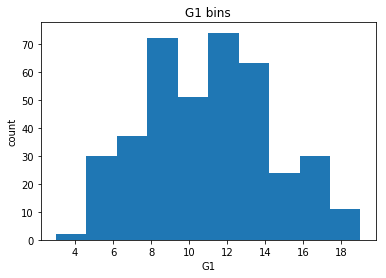

In [26]:
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["G1"])

# set x/y labels and plot title
plt.pyplot.xlabel("G1")
plt.pyplot.ylabel("count")
plt.pyplot.title("G1 bins")

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of G1 we want to set start_value=min(df["G1"]).</p>
<p>Since we want to include the maximum value of G1 we want to set end_value=max(df["G1"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.</p>

We build a bin array, with a minimum value to a maximum value, with bandwidth calculated above. The bins will be values used to determine when one bin ends and another begins.

In [27]:
bins = np.linspace(min(df["G1"]), max(df["G1"]), 4)
bins

array([ 3.        ,  8.33333333, 13.66666667, 19.        ])

 We set group  names:

In [0]:
group_names = ['Low', 'Medium', 'High']

 We apply the function "cut" the determine what each value of "df['G1']" belongs to. 

In [29]:
df['G1-binned'] = pd.cut(df['G1'], bins, labels=group_names, include_lowest=True )
df[['G1','G1-binned']].head(10)

,G1,G1-binned
0,5,Low
1,5,Low
2,7,Low
3,15,High
4,6,Low
5,15,High
6,12,Medium
7,16,High
8,14,High
9,10,Medium


Lets see the number of vehicles in each bin.

In [30]:
df["G1-binned"].value_counts(sort=False)

Low       110
Medium    189
High       95
Name: G1-binned, dtype: int64

Lets plot the distribution of each bin.

Text(0.5, 1.0, 'G1 bins')

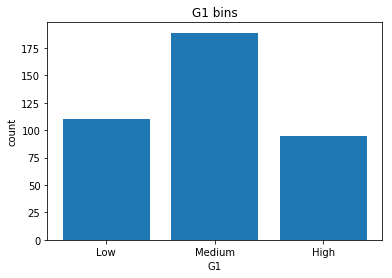

In [31]:
pyplot.bar(group_names, df["G1-binned"].value_counts(sort=False))

# set x/y labels and plot title
plt.pyplot.xlabel("G1")
plt.pyplot.ylabel("count")
plt.pyplot.title("G1 bins")

<p>
    Check the dataframe above carefully, you will find the last column provides the bins for "G1" with 3 categories ("Low","Medium" and "High"). 
</p>
<p>
    We successfully narrow the intervals to 3!
</p>

<h3>Bins visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 

Text(0.5, 1.0, 'G1 bins')

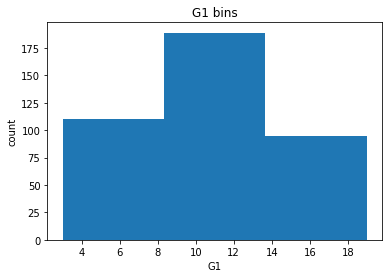

In [32]:

# draw historgram of attribute "G1" with bins = 3
plt.pyplot.hist(df["G1"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("G1")
plt.pyplot.ylabel("count")
plt.pyplot.title("G1 bins")

The plot above shows the binning result for attribute "G1". 

#Turning categorical into quantitative variables

<h2 id="indicator">Indicator variable (or dummy variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>
<p>
    So we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "address" has two unique values, "R" or "U". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "address" into indicator variables.
</p>

<p>
    We will use the panda's method 'get_dummies' to assign numerical values to different categories of address type. 
</p>

get indicator variables and assign it to data frame "dummy_variable_1" 

In [33]:
#get indicator variables and assign it to data frame "dummy_variable_1"
dummy_variable_1 = pd.get_dummies(df["address"])
dummy_variable_1.head()

,R,U
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


change column names for clarity 

In [34]:
dummy_variable_1.rename(columns={'R':'address_R', 'U':'address_U'}, inplace=True)
dummy_variable_1.head()

,address_R,address_U
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


We now have the value 0 to represent "address_R" and 1 to represent "address_U" in the column "address". We will now insert this column back into our original dataset. 

In [0]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("address", axis = 1, inplace=True)

In [36]:
df.head()

,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G1-binned,address_R,address_U
0,F,0.818182,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,5,5,6.0,6,Low,0,1
1,F,0.772727,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,5,5,5.0,6,Low,0,1
2,F,0.681818,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8.0,10,Low,0,1
3,F,0.681818,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14.0,15,High,0,1
4,F,0.727273,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10.0,10,Low,0,1


The last two columns are now the indicator variable representation of the address variable. It's all 0s and 1s now.

<h3>save the new csv </h3>

In [0]:
df.to_csv('clean_df.csv')

##Easy way to Turn categorical into quantitative

In [38]:
csv_file="https://raw.githubusercontent.com/gdg-ml-team/DevFest19/master/student-math.csv"
dataf = pd.read_csv(csv_file)
dataf.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [39]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [40]:
columns  = dataf.columns;
for coloumn in columns :
    if (str(dataf[coloumn].dtype).startswith("object")):
            values = dataf[coloumn].unique()
            convertor = dict(zip(values,range(len(values))))
            print(coloumn,convertor)
            dataf[coloumn] = [convertor[item] for item in dataf[coloumn]]

school {'GP': 0, 'MS': 1}
sex {'F': 0, 'M': 1}
address {'U': 0, 'R': 1}
famsize {'GT3': 0, 'LE3': 1}
Pstatus {'A': 0, 'T': 1}
Mjob {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}
Fjob {'teacher': 0, 'other': 1, 'services': 2, 'health': 3, 'at_home': 4}
reason {'course': 0, 'other': 1, 'home': 2, 'reputation': 3}
guardian {'mother': 0, 'father': 1, 'other': 2}
schoolsup {'yes': 0, 'no': 1}
famsup {'no': 0, 'yes': 1}
paid {'no': 0, 'yes': 1}
activities {'no': 0, 'yes': 1}
nursery {'yes': 0, 'no': 1}
higher {'yes': 0, 'no': 1}
internet {'no': 0, 'yes': 1}
romantic {'no': 0, 'yes': 1}


In [41]:
dataf.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,0,4,4,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,0,1,1,1,0,1,0,1,1,2,0,1,1,0,0,1,0,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,1,1,1,1,0,1,1,0,1,2,3,0,0,1,0,0,0,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,0,1,4,2,1,2,2,0,1,3,0,1,1,1,1,0,0,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,0,1,3,3,2,1,2,1,1,2,0,1,1,1,0,0,0,0,0,4,3,2,1,2,5,4,6,10,10


In [0]:
dataf.to_csv('clean_dataf.csv')